In [2]:
import pyreadr
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("data/bfd_2023.csv")

/tmp/ipykernel_17331/3014514501.py:1: DtypeWarning: Columns (5,42,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/bfd_2023.csv")


In [13]:
df.shape

(946196, 48)

In [21]:
df.columns

Index(['arrival', 'depart', 'route', 'company', 'flight', 'di', 'type',
       'depart_day_period', 'arrival_day_period', 'expected_depart',
       'real_depart', 'expected_arrival', 'real_arrival', 'status_depart',
       'status_arrival', 'observation', 'delay_depart', 'delay_arrival',
       'expected_flight_length', 'real_flight_length', 'outlier_depart_delay',
       'outlier_arrival_delay', 'outlier_expected_flight_consistency',
       'outlier_real_flight_consistency', 'outlier_expected_flight_length',
       'outlier_real_flight_length', 'depart_air_temperature',
       'depart_dew_point', 'depart_relative_humidity', 'depart_wind_direction',
       'depart_wind_speed', 'depart_sky_coverage', 'depart_pressure',
       'depart_visibility', 'depart_apparent_temperature',
       'depart_wind_speed_scale', 'depart_wind_direction_cat',
       'arrival_air_temperature', 'arrival_dew_point',
       'arrival_relative_humidity', 'arrival_wind_direction',
       'arrival_wind_speed', 'arr

In [20]:
df.describe()

,observation,delay_depart,delay_arrival,expected_flight_length,real_flight_length,depart_air_temperature,depart_dew_point,depart_relative_humidity,depart_wind_direction,depart_wind_speed,...,depart_visibility,depart_apparent_temperature,arrival_air_temperature,arrival_dew_point,arrival_relative_humidity,arrival_wind_direction,arrival_wind_speed,arrival_pressure,arrival_visibility,arrival_apparent_temperature
count,0.0,894011.000000,894011.000000,946196.000000,894011.000000,837072.000000,836600.000000,836600.000000,802189.000000,837504.000000,...,837719.000000,836597.000000,835822.000000,835374.000000,835374.000000,801718.000000,836261.000000,836430.000000,836462.000000,835370.000000
mean,NaN,6.339992,3.958940,152.988683,144.555505,23.733838,17.968122,72.774239,151.716715,6.667251,...,5.908140,24.466942,23.800992,17.937183,72.465073,152.535705,6.676759,30.006117,5.916737,24.540988
std,NaN,560.440088,560.736827,143.792110,132.277533,4.980394,4.448486,17.721363,97.933702,3.731817,...,0.918761,5.971218,5.000326,4.505372,17.979463,98.131356,3.730805,0.191597,0.905438,5.974519
min,NaN,-524906.000000,-524907.000000,0.000000,1.000000,1.000000,-5.000000,9.050000,0.000000,0.000000,...,0.000000,-1.377778,1.000000,-5.000000,10.530000,0.000000,0.000000,2.950000,0.000000,-3.444444
25%,NaN,-6.000000,-10.000000,75.000000,74.000000,20.000000,15.000000,61.580000,80.000000,4.000000,...,6.210000,20.000000,20.000000,15.000000,61.360000,80.000000,4.000000,29.910000,6.210000,20.000000
50%,NaN,-1.000000,-2.000000,105.000000,100.000000,24.000000,19.000000,74.280000,130.000000,6.000000,...,6.210000,24.000000,24.000000,18.000000,74.280000,130.000000,6.000000,30.000000,6.210000,24.000000
75%,NaN,10.000000,10.000000,165.000000,159.000000,27.000000,22.000000,88.000000,200.000000,9.000000,...,6.210000,29.127778,27.000000,22.000000,88.000000,200.000000,9.000000,30.090000,6.210000,29.205556
max,NaN,5650.000000,5652.000000,1395.000000,1793.000000,42.000000,33.000000,100.000000,360.000000,99.000000,...,6.210000,59.661111,42.000000,33.000000,100.000000,360.000000,99.000000,34.280000,6.210000,63.233333


In [16]:
df.isna().sum()

arrival                                     0
depart                                      0
route                                       0
company                                     0
flight                                      0
di                                          0
type                                        0
depart_day_period                           0
arrival_day_period                          0
expected_depart                             0
real_depart                             52185
expected_arrival                            0
real_arrival                            52185
status_depart                           52185
status_arrival                          52185
observation                            946196
delay_depart                            52185
delay_arrival                           52185
expected_flight_length                      0
real_flight_length                      52185
outlier_depart_delay                    52185
outlier_arrival_delay             

In [23]:
print(df['status_depart'].value_counts())
print("-" * 20)
print(df['status_arrival'].value_counts())

status_depart
Antecipado        455338
Pontual           355673
Atraso 30-60       49490
Atraso 60-120      20941
Atraso 120-240      8485
Atraso > 240        4084
Name: count, dtype: int64
--------------------
status_arrival
Antecipado        485824
Pontual           320991
Atraso 30-60       52465
Atraso 60-120      21728
Atraso 120-240      8895
Atraso > 240        4108
Name: count, dtype: int64


In [26]:
print(df['status_depart'].value_counts(normalize=True))
print("-" * 20)
print(df['status_arrival'].value_counts(normalize=True))

status_depart
Antecipado        0.509320
Pontual           0.397840
Atraso 30-60      0.055357
Atraso 60-120     0.023424
Atraso 120-240    0.009491
Atraso > 240      0.004568
Name: proportion, dtype: float64
--------------------
status_arrival
Antecipado        0.543421
Pontual           0.359046
Atraso 30-60      0.058685
Atraso 60-120     0.024304
Atraso 120-240    0.009950
Atraso > 240      0.004595
Name: proportion, dtype: float64


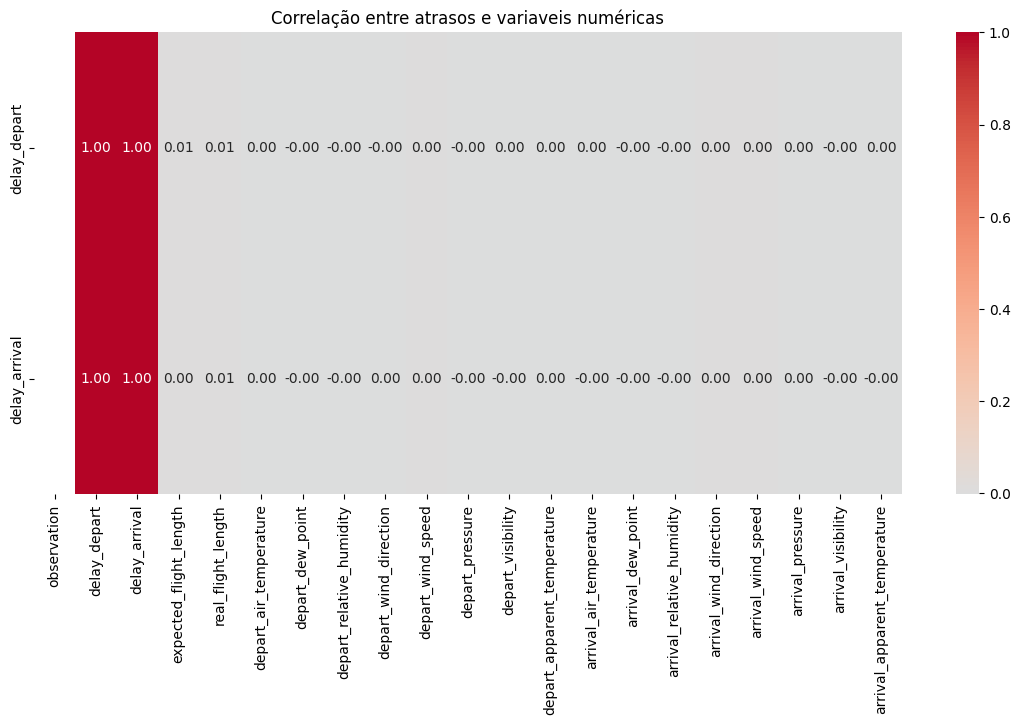

In [34]:
cols = df.select_dtypes(include=['number']).columns.tolist()

corr = df[cols].corr()

plt.figure(figsize=(14,6))
sns.heatmap(
    corr.loc[['delay_depart', 'delay_arrival']],
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f'
    )
plt.title('Correlação entre atrasos e variaveis numéricas')
plt.show()

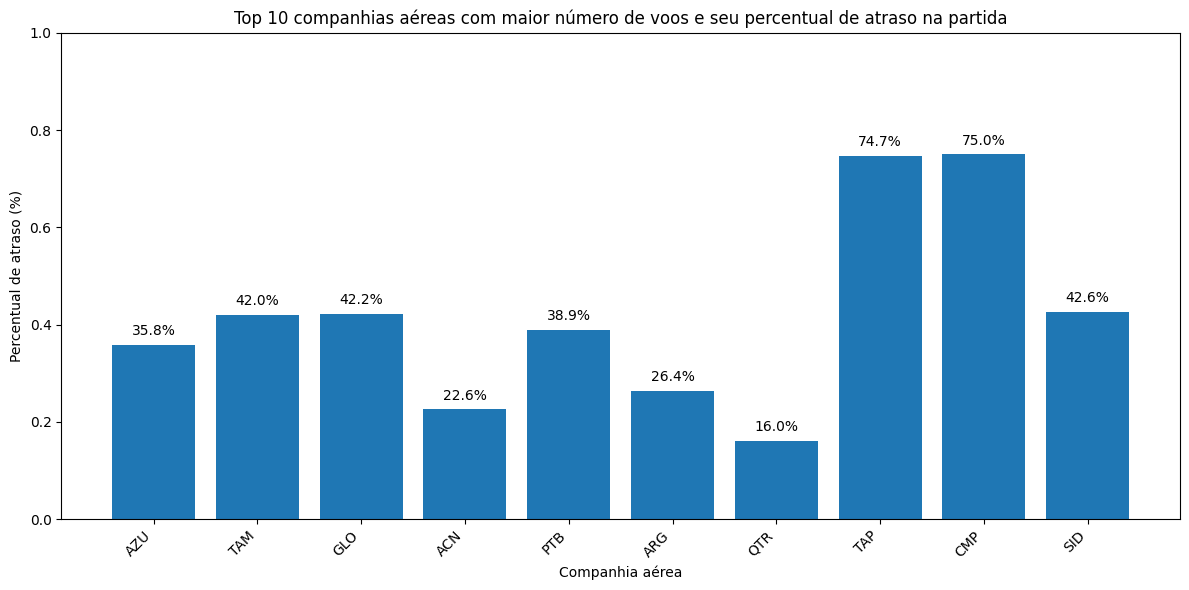

In [40]:
df_plot = df.copy()

df_plot['depart_delay_flag'] = df_plot['delay_depart'].apply(lambda x: 'Atraso' if x > 0 else 'Não atraso')

grouped = df_plot.groupby(['company', 'depart_delay_flag']).size().unstack(fill_value=0)

grouped['total_voos'] = grouped['Atraso'] + grouped['Não atraso']
top10_volume = grouped.sort_values('total_voos', ascending=False).head(10)

top10_volume['percent_atraso'] = top10_volume['Atraso'] / top10_volume['total_voos']

plt.figure(figsize=(12,6))
plt.bar(top10_volume.index, top10_volume['percent_atraso'])
plt.title('Top 10 companhias aéreas com maior número de voos e seu percentual de atraso na partida')
plt.xlabel('Companhia aérea')
plt.ylabel('Percentual de atraso (%)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0,1)

for i, v in enumerate(top10_volume['percent_atraso']):
    plt.text(i, v + 0.02, f"{v:.1%}", ha='center')

plt.tight_layout()
plt.show()

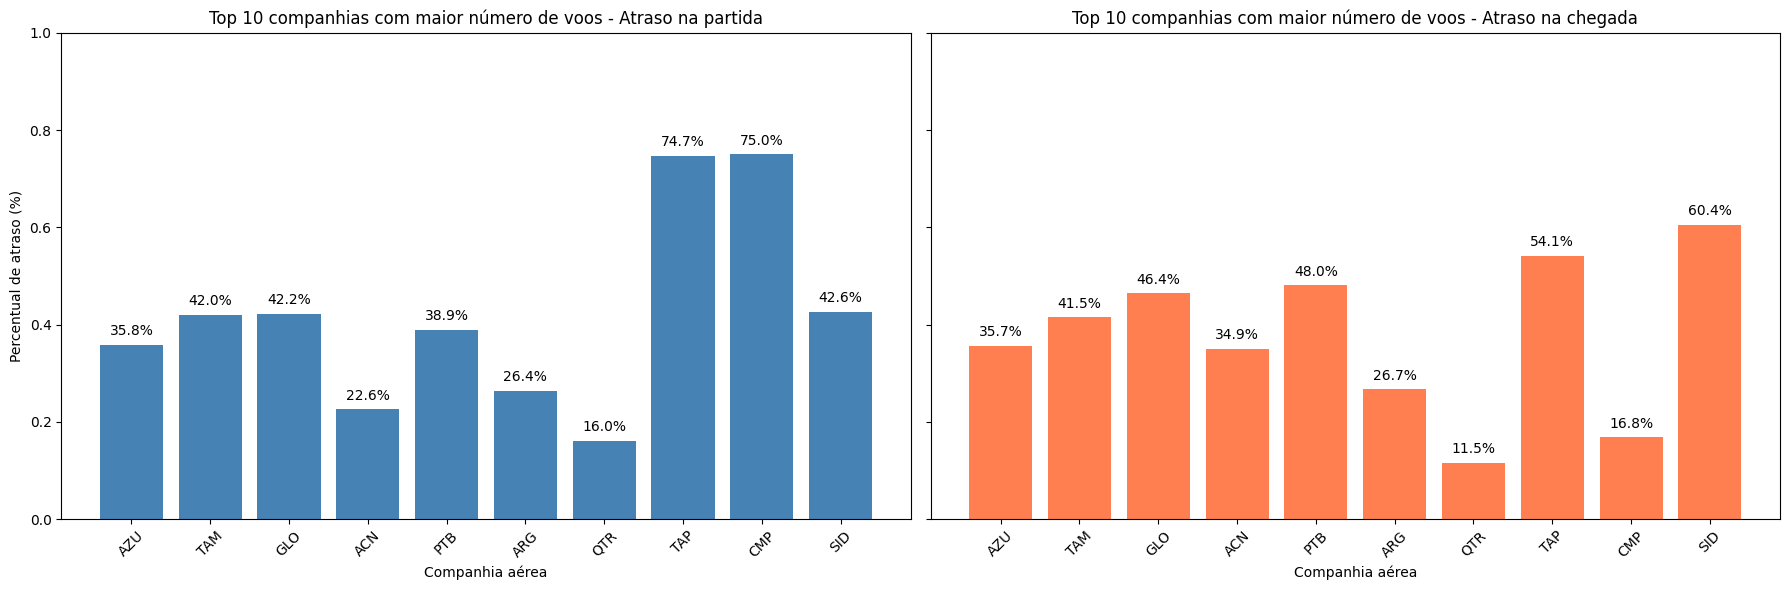

In [43]:
df_plot = df.copy()

df_plot['depart_delay_flag'] = df_plot['delay_depart'].apply(lambda x: 'Atraso' if x > 0 else 'Não atraso')
grouped_depart = df_plot.groupby(['company', 'depart_delay_flag']).size().unstack(fill_value=0)
grouped_depart['total_voos'] = grouped_depart['Atraso'] + grouped_depart['Não atraso']
top10_depart = grouped_depart.sort_values('total_voos', ascending=False).head(10)
top10_depart['percent_atraso'] = top10_depart['Atraso'] / top10_depart['total_voos']

df_plot['arrival_delay_flag'] = df_plot['delay_arrival'].apply(lambda x: 'Atraso' if x > 0 else 'Não atraso')
grouped_arrival = df_plot.groupby(['company', 'arrival_delay_flag']).size().unstack(fill_value=0)
grouped_arrival['total_voos'] = grouped_arrival['Atraso'] + grouped_arrival['Não atraso']
top10_arrival = grouped_arrival.sort_values('total_voos', ascending=False).head(10)
top10_arrival['percent_atraso'] = top10_arrival['Atraso'] / top10_arrival['total_voos']

fig, axs = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

axs[0].bar(top10_depart.index, top10_depart['percent_atraso'], color='steelblue')
axs[0].set_title('Top 10 companhias com maior número de voos - Atraso na partida')
axs[0].set_xlabel('Companhia aérea')
axs[0].set_ylabel('Percentual de atraso (%)')
axs[0].set_ylim(0, 1)
axs[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(top10_depart['percent_atraso']):
    axs[0].text(i, v + 0.02, f"{v:.1%}", ha='center')

axs[1].bar(top10_arrival.index, top10_arrival['percent_atraso'], color='coral')
axs[1].set_title('Top 10 companhias com maior número de voos - Atraso na chegada')
axs[1].set_xlabel('Companhia aérea')
axs[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(top10_arrival['percent_atraso']):
    axs[1].text(i, v + 0.02, f"{v:.1%}", ha='center')

plt.tight_layout()
plt.show()


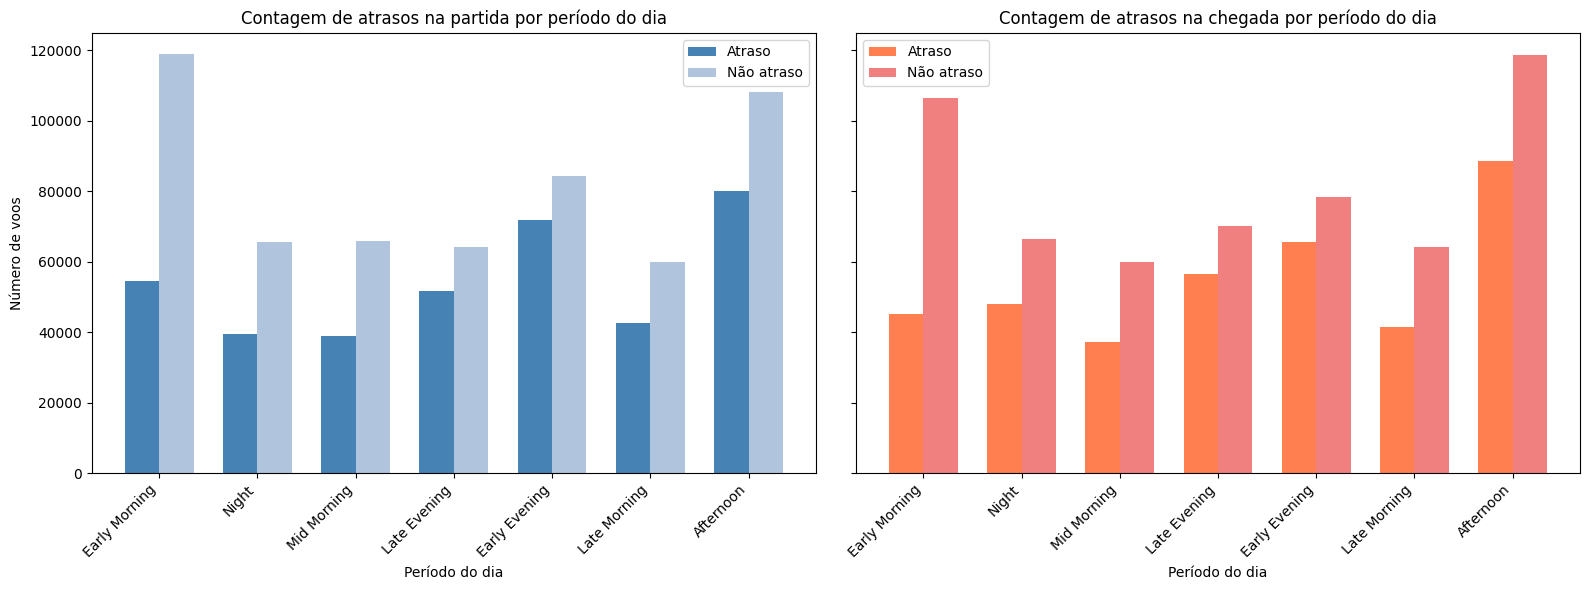

In [ ]:
df_plot = df.copy()

df_plot['depart_delay_flag'] = df_plot['delay_depart'].apply(lambda x: 'Atraso' if x > 0 else 'Não atraso')
df_plot['arrival_delay_flag'] = df_plot['delay_arrival'].apply(lambda x: 'Atraso' if x > 0 else 'Não atraso')

grouped_depart = df_plot.groupby(['depart_day_period', 'depart_delay_flag']).size().unstack(fill_value=0)
grouped_arrival = df_plot.groupby(['arrival_day_period', 'arrival_delay_flag']).size().unstack(fill_value=0)

period_order = df['arrival_day_period'].unique().tolist()

grouped_depart = grouped_depart.reindex(period_order)
grouped_arrival = grouped_arrival.reindex(period_order)

bar_width = 0.35
x_depart = np.arange(len(grouped_depart.index))
x_arrival = np.arange(len(grouped_arrival.index))

fig, axs = plt.subplots(1, 2, figsize=(16,6), sharey=True)

axs[0].bar(x_depart - bar_width/2, grouped_depart['Atraso'], width=bar_width, label='Atraso', color='steelblue')
axs[0].bar(x_depart + bar_width/2, grouped_depart['Não atraso'], width=bar_width, label='Não atraso', color='lightsteelblue')
axs[0].set_title('Contagem de atrasos na partida por período do dia')
axs[0].set_xlabel('Período do dia')
axs[0].set_ylabel('Número de voos')
axs[0].set_xticks(x_depart)
axs[0].set_xticklabels(grouped_depart.index, rotation=45, ha='right')
axs[0].legend()

axs[1].bar(x_arrival - bar_width/2, grouped_arrival['Atraso'], width=bar_width, label='Atraso', color='coral')
axs[1].bar(x_arrival + bar_width/2, grouped_arrival['Não atraso'], width=bar_width, label='Não atraso', color='lightcoral')
axs[1].set_title('Contagem de atrasos na chegada por período do dia')
axs[1].set_xlabel('Período do dia')
axs[1].set_xticks(x_arrival)
axs[1].set_xticklabels(grouped_arrival.index, rotation=45, ha='right')
axs[1].legend()

plt.tight_layout()
plt.show()
